<a href="https://colab.research.google.com/github/viktoruebelhart/classify_sklearn/blob/main/machine_learning_SKlearn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)

data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
data.shape

(2157, 3)

In [ ]:
change = {
    0 : 1,
    1 : 0
}
data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='expected_hours', ylabel='price'>

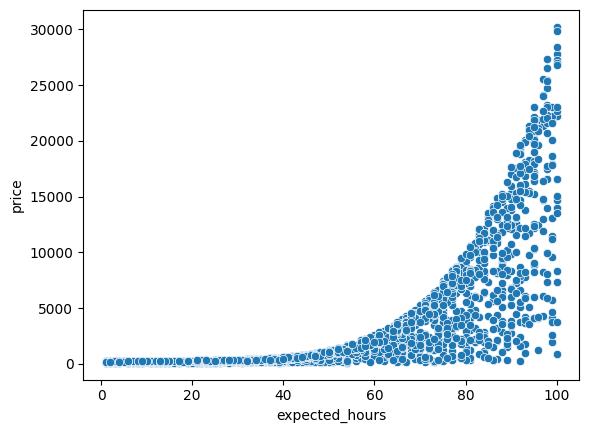

In [ ]:
import seaborn as sns
sns.scatterplot(x='expected_hours', y='price', data=data)

<Axes: xlabel='expected_hours', ylabel='price'>

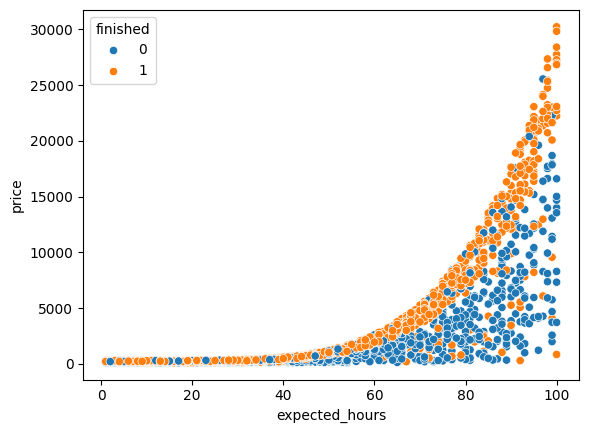

In [ ]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

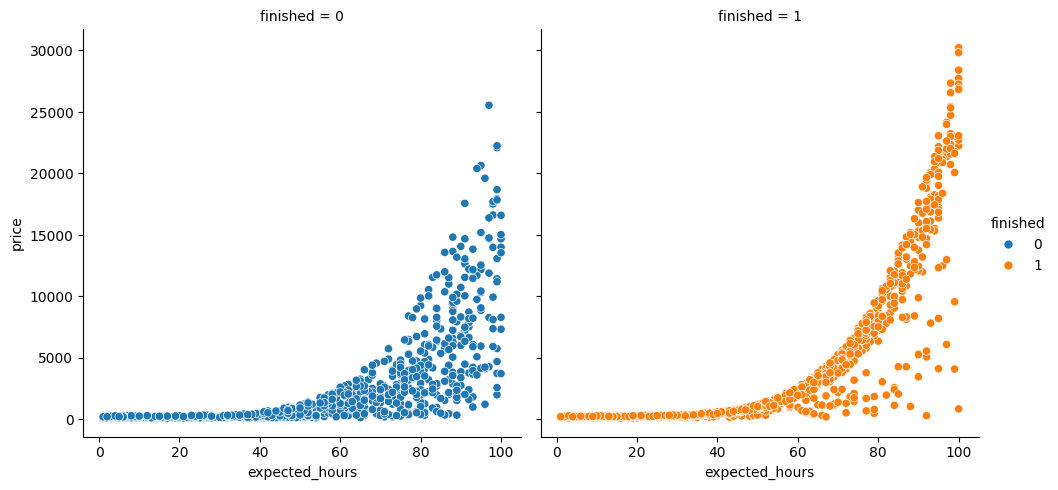

In [ ]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [ ]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [ ]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("We will train with %d elements and test with %d elements"% (len(train_x), len(test_x)))

model=LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The accuracy was 55.93%


In [ ]:
#baseline
import numpy as np
forecast_baseline = np.ones(540)
accuracy = accuracy_score(test_y, forecast_baseline) * 100
print("The baseline accuracy was %.2f%%" % accuracy)

The baseline accuracy was 52.59%


<Axes: xlabel='expected_hours', ylabel='price'>

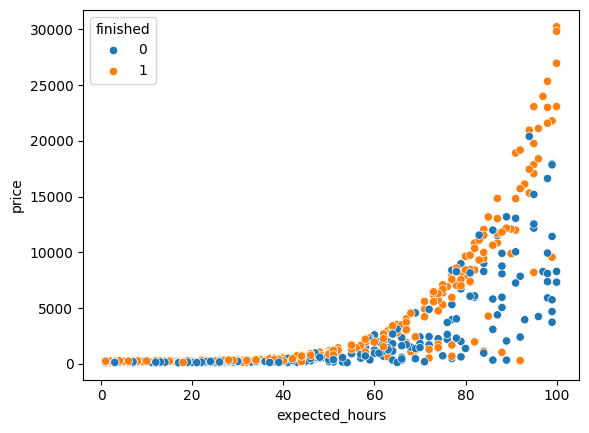

In [ ]:
sns.scatterplot(x='expected_hours', y='price', hue=test_y, data=test_x)

In [ ]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [ ]:
pixels = 100
axle_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axle_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(axle_x, axle_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [ ]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

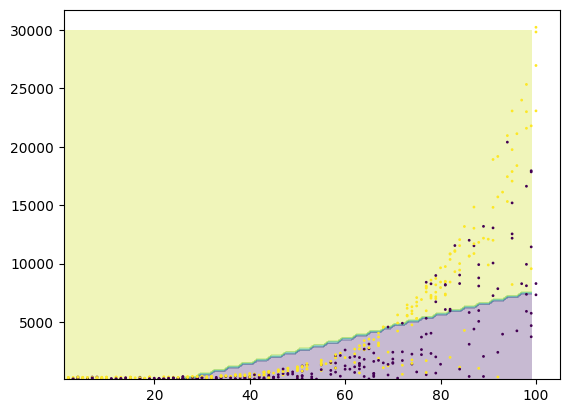

In [ ]:
#Decision Boundary
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

plt.show()

# The estimated Linear is not the correct one


In [ ]:
#Using SVC

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("We will train with %d elements and test with %d elements"% (len(train_x), len(test_x)))

model=SVC(gamma='auto')
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The accuracy was 59.07%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


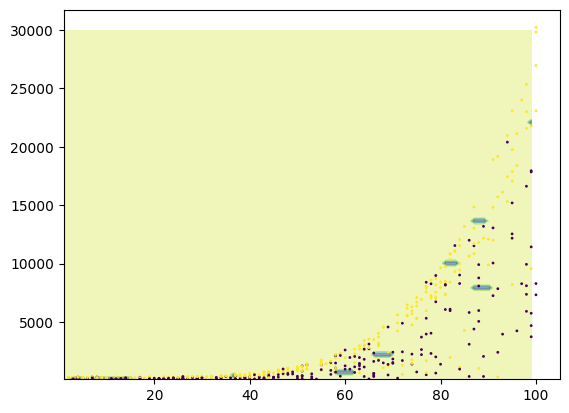

In [ ]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100
axle_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axle_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axle_x, axle_y)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

#Decision Boundary
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

plt.show()

In [ ]:
#Changing The Scale
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("We will train with %d elements and test with %d elements"% (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

model=SVC(gamma='auto')
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The accuracy was 66.85%


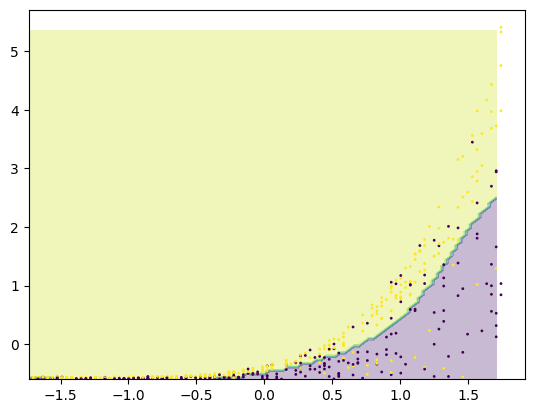

In [ ]:
data_x = test_x[:, 0]
data_y = test_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
axle_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axle_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axle_x, axle_y)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

#Decision Boundary
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

plt.show()